In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [36]:
df=pd.read_csv(r"C:\Users\bt76\Desktop\Python\Stats\aerofit_treadmill.csv")
df.head()

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
0,KP281,18,Male,14,Single,3,4,29562,112
1,KP281,19,Male,15,Single,2,3,31836,75
2,KP281,19,Female,14,Partnered,4,3,30699,66
3,KP281,19,Male,12,Single,3,3,32973,85
4,KP281,20,Male,13,Partnered,4,2,35247,47


In [5]:
df.dtypes

Product          object
Age               int64
Gender           object
Education         int64
MaritalStatus    object
Usage             int64
Fitness           int64
Income            int64
Miles             int64
dtype: object

In [6]:
df.shape

(180, 9)

we have 180 rows and 9 columns, and Age, Education, Usage, Fitness, Income, Miles these are continuous variables and the question ask us to detect the outliers for those. 

<Axes: xlabel='Age'>

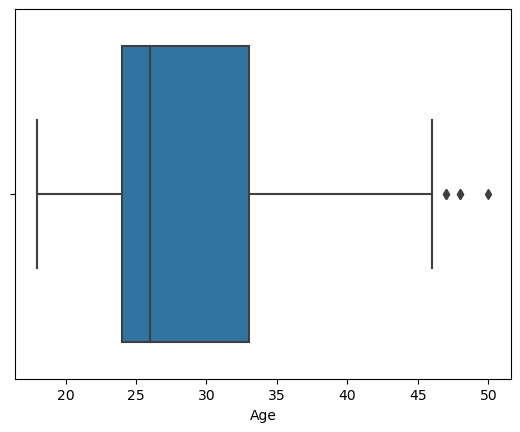

In [7]:
sns.boxplot(data=df, x="Age")

From the above plot we can see that the majority of the people falls between the age of 25-30 years, but few outliers are there where the age is above 45 years

<Axes: xlabel='Education'>

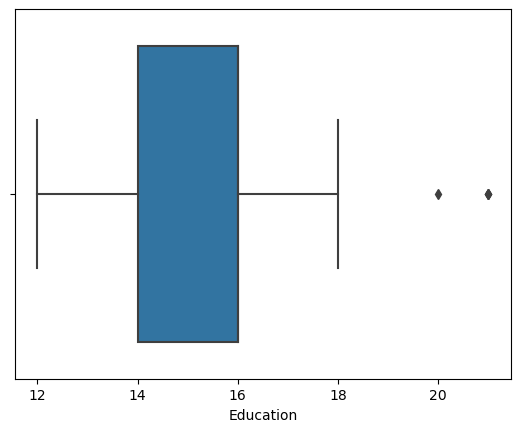

In [38]:
sns.boxplot(data=df, x="Education")

Most of the people has had 14-16 years of complete educaton but there are few exceptions where people had more than 19-20 years of education, they would probably be people with doctor degrees and phds, lets analyse more

<Axes: xlabel='Usage'>

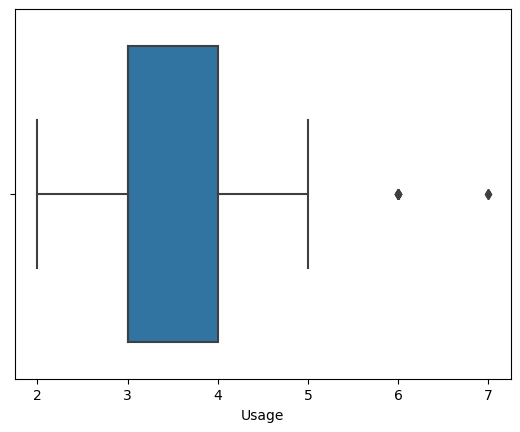

In [9]:
sns.boxplot(data=df, x="Usage")

From the above analysis we can clearly see that most of the customers want to use the treadmil minimum of 3-4 times a week, although few outliers present where the customers want to use the treadmil 6,7 times a week


<Axes: xlabel='Fitness'>

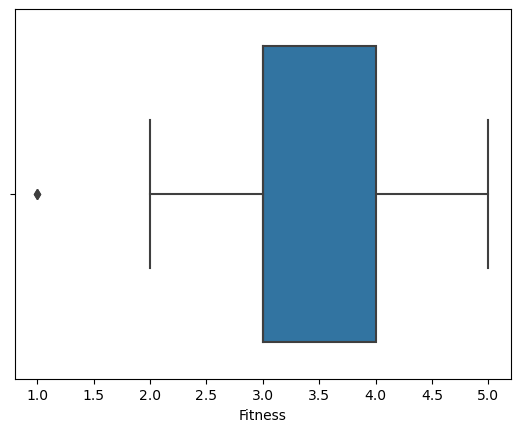

In [10]:
sns.boxplot(data=df, x="Fitness")

There are no outliers here, in a way its true as its a self rated fitness rating, means most of the person rates themselves to between mildly fit to fit(3-4)

<Axes: xlabel='Income'>

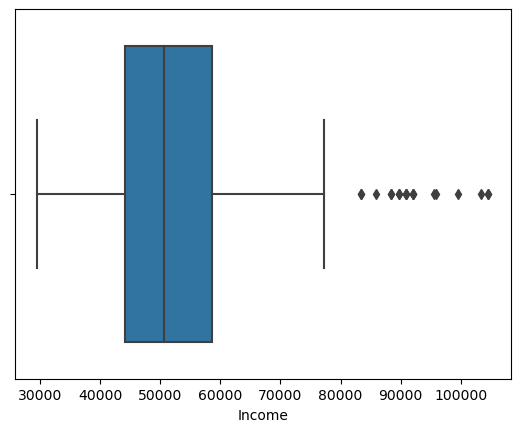

In [12]:
sns.boxplot(data=df, x="Income")

As per the above observation, we can see most of the people have income range in between 45000-60000, although outliers are present where the income is above 80000 to 1000000

<Axes: xlabel='Miles'>

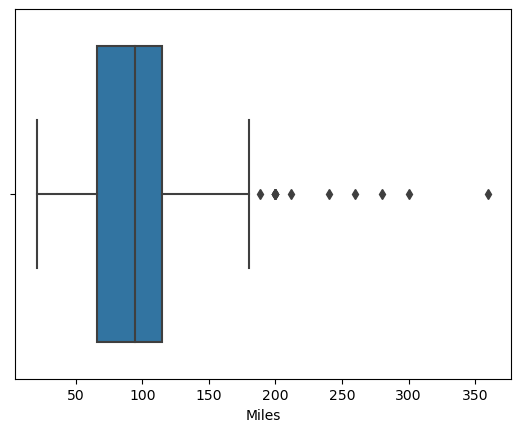

In [13]:
sns.boxplot(data=df, x="Miles")

As per the above data average customer expects himlsef to cover 50-100 miles each week, again outliers are present here where few people expects themselves walking more than 150 miles weekly (maybe they fall under athlic category)

In [17]:
df.describe()

,Age,Education,Usage,Fitness,Income,Miles
count,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000
mean,28.788889,15.572222,3.455556,3.311111,53719.577778,103.194444
std,6.943498,1.617055,1.084797,0.958869,16506.684226,51.863605
min,18.000000,12.000000,2.000000,1.000000,29562.000000,21.000000
25%,24.000000,14.000000,3.000000,3.000000,44058.750000,66.000000
50%,26.000000,16.000000,3.000000,3.000000,50596.500000,94.000000
75%,33.000000,16.000000,4.000000,4.000000,58668.000000,114.750000
max,50.000000,21.000000,7.000000,5.000000,104581.000000,360.000000


In [48]:


continuous_columns=['Age','Education','Usage','Fitness','Income','Miles']

for cols in continuous_columns: 
    
    print(cols)
    
    fifth_percentile=np.percentile(df[cols], q=5)
    
    nintyfifth_percentile=np.percentile(df[cols], q=95)
    
    df_new=np.clip(df[cols], fifth_percentile, nintyfifth_percentile)
    
df

Age
Education
Usage
Fitness
Income
Miles


,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
0,KP281,18,Male,14,Single,3,4,29562,112
1,KP281,19,Male,15,Single,2,3,31836,75
2,KP281,19,Female,14,Partnered,4,3,30699,66
3,KP281,19,Male,12,Single,3,3,32973,85
4,KP281,20,Male,13,Partnered,4,2,35247,47
...,...,...,...,...,...,...,...,...,...
175,KP781,40,Male,21,Single,6,5,83416,200
176,KP781,42,Male,18,Single,5,4,89641,200
177,KP781,45,Male,16,Single,5,5,90886,160
178,KP781,47,Male,18,Partnered,4,5,104581,120


In [47]:
df.describe()

,Age,Education,Usage,Fitness,Income,Miles
count,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000
mean,28.788889,15.572222,3.455556,3.311111,53719.577778,103.194444
std,6.943498,1.617055,1.084797,0.958869,16506.684226,51.863605
min,18.000000,12.000000,2.000000,1.000000,29562.000000,21.000000
25%,24.000000,14.000000,3.000000,3.000000,44058.750000,66.000000
50%,26.000000,16.000000,3.000000,3.000000,50596.500000,94.000000
75%,33.000000,16.000000,4.000000,4.000000,58668.000000,114.750000
max,50.000000,21.000000,7.000000,5.000000,104581.000000,360.000000


clipped the data between 5th and 95th percentile for the continous columns

3. Check if features like marital status, Gender, and age have any effect on the product
purchased

In [53]:
df['Product'].unique()

array(['KP281', 'KP481', 'KP781'], dtype=object)

As per this we can see that we have three types of product ['KP281', 'KP481', 'KP781'] lets see the relationship between the product and the marital status, Gender, and age 

<Axes: xlabel='Product', ylabel='count'>

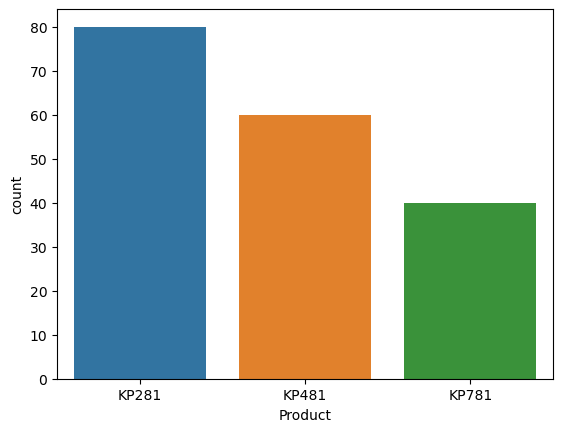

In [58]:
sns.countplot(data=df, x='Product')

From this we can see KP281 is the most sell product for aerofit treadmils.

<Axes: xlabel='MaritalStatus', ylabel='count'>

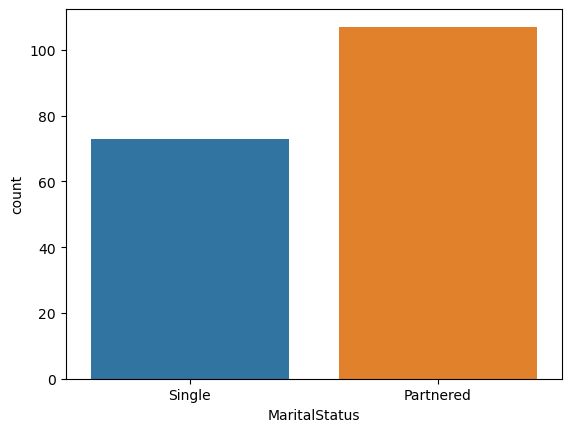

In [59]:
sns.countplot(data=df, x='MaritalStatus')

most of the people we can see are married

<Axes: xlabel='Gender', ylabel='count'>

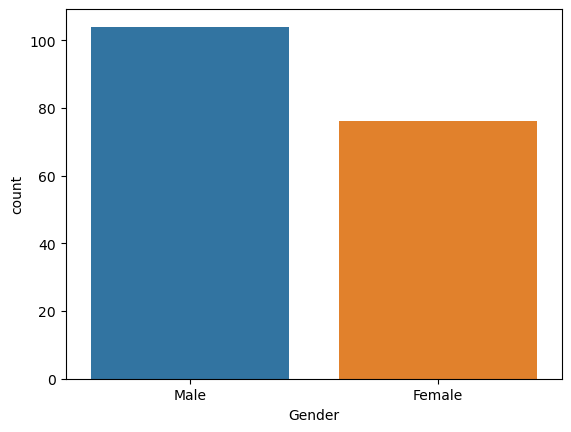

In [61]:
sns.countplot(data=df, x='Gender')
plt.show()


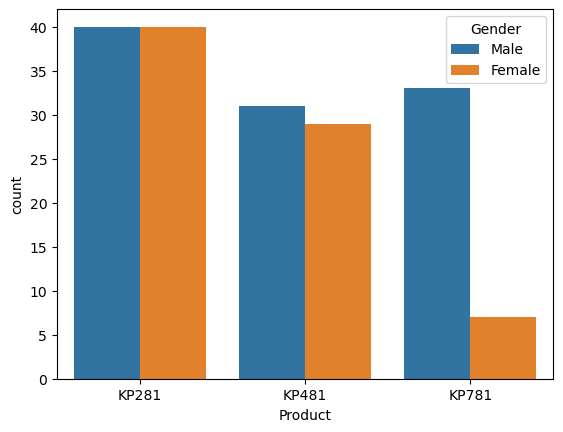

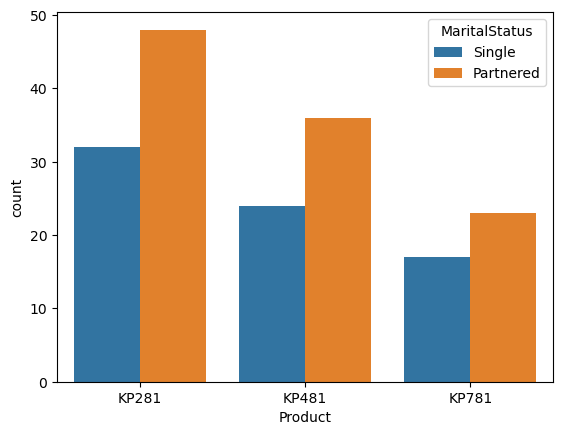

In [79]:
sns.countplot(data=df, x='Product', hue='Gender')
plt.show()

sns.countplot(data=df, x='Product', hue='MaritalStatus')
plt.show()


We can observe that most of the people who are married had bought more, plus KP281 has been bought equally by males and females, whereas for KP481 and KP781 female has bought more

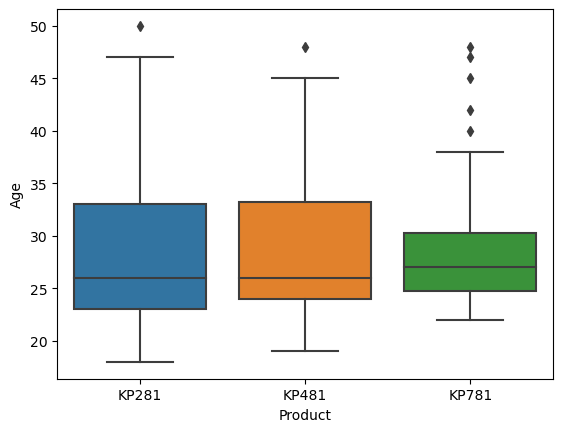

In [66]:
sns.boxplot(data=df, x='Product', y='Age')
plt.show()


We can observe that there are outliers present for KP781 product where people from age group of 40-50 has purchased few products but for most cases we can see that the age group falls between 25-30

C:\Users\bt76\AppData\Local\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


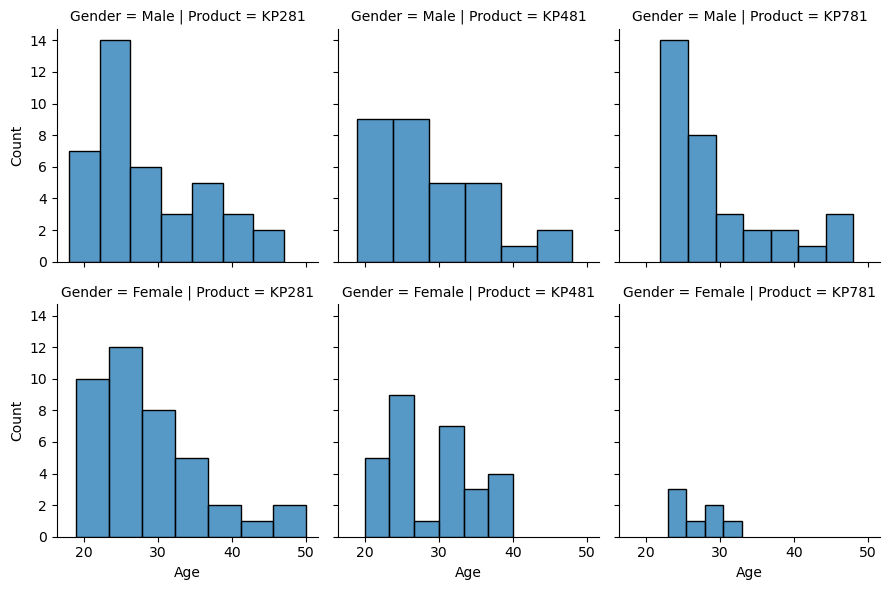

In [69]:
g=sns.FacetGrid(df, col='Product', row="Gender")
g.map(sns.histplot, 'Age')
plt.show()

We can see for product KP281, both male and female has bought it equally, but for KP481 and KP781 we can see that the male audience has preferred the product more rather than female audience.

<Axes: xlabel='Gender,MaritalStatus'>

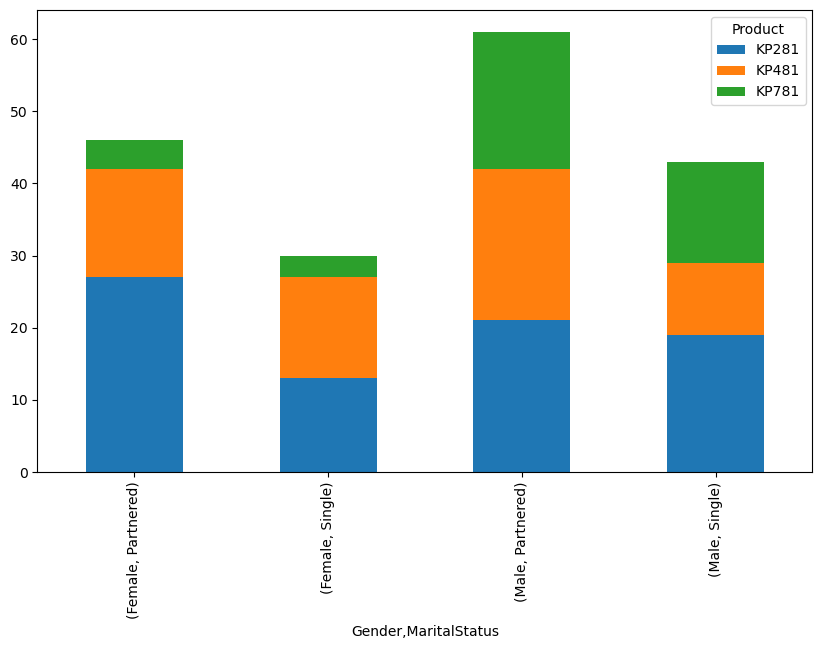

In [93]:
ct=pd.crosstab([df['Gender'], df['MaritalStatus']], columns=df['Product'])
ct.plot(kind='bar', stacked=True, figsize=(10,6))

<Axes: xlabel='Product', ylabel='Income'>

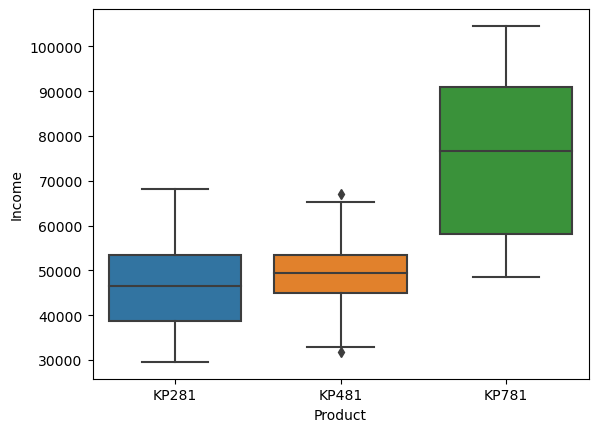

In [287]:
sns.boxplot(data=df, x='Product', y='Income')

<Axes: xlabel='Product', ylabel='Education'>

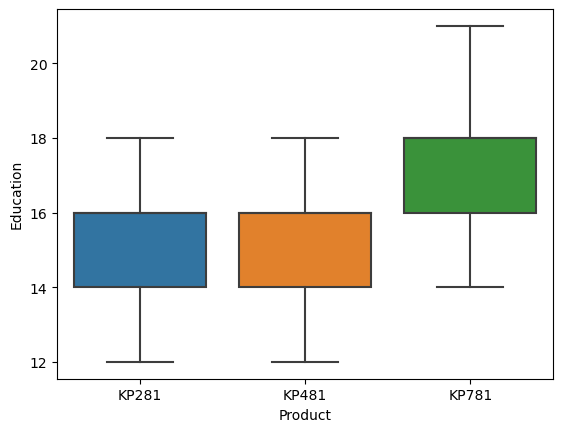

In [289]:
sns.boxplot(data=df, x='Product', y='Education')

<Axes: xlabel='Product', ylabel='Miles'>

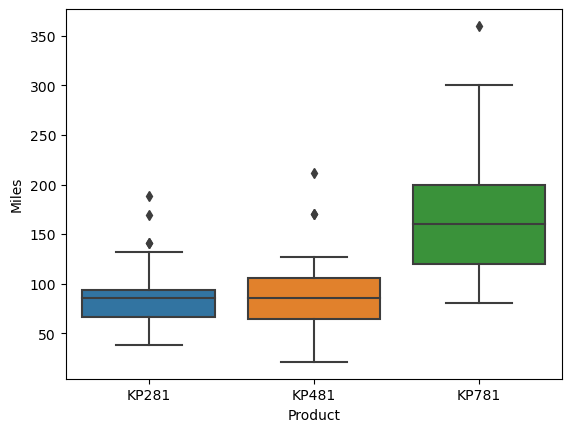

In [288]:
sns.boxplot(data=df, x='Product', y='Miles')

In [290]:
df.columns

Index(['Product', 'Age', 'Gender', 'Education', 'MaritalStatus', 'Usage',
       'Fitness', 'Income', 'Miles'],
      dtype='object')

<Axes: xlabel='Product', ylabel='Usage'>

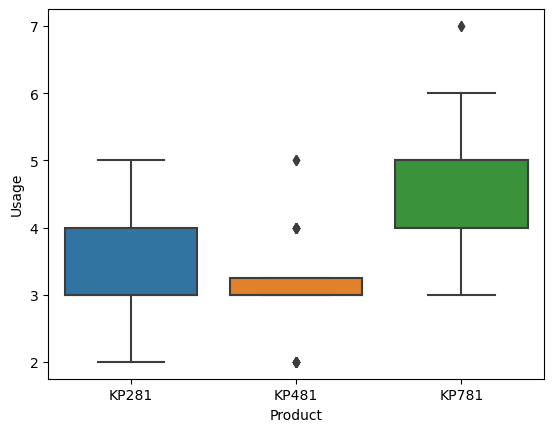

In [291]:
sns.boxplot(data=df, x='Product', y='Usage')

<Axes: xlabel='Product', ylabel='Age'>

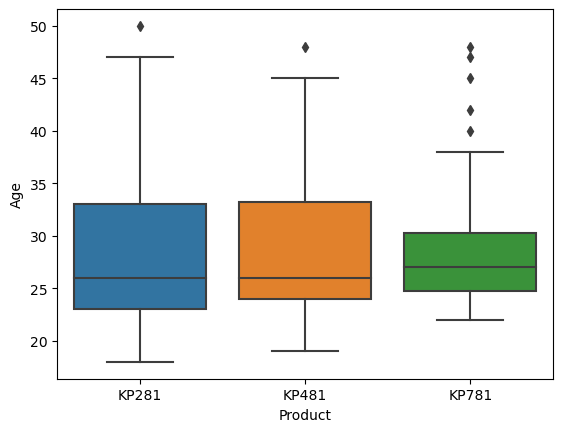

In [292]:
sns.boxplot(data=df, x='Product', y='Age')

Representing the Probability    
Find the marginal probability (what percent of customers have purchased
KP281, KP481, or KP781)
Hint: We want you to use the pandas crosstab to find the marginal probability
of each product.
○ Find the probability that the customer buys a product based on each column.
Hint: Based on previous crosstab values you find the probability.
○ Find the conditional probability that an event occurs given that another event has
occurred. (Example: given that a customer is female, what is the probability
she’ll purchase a KP481)
Hint: Based on previous crosstab values you find the probability.

In [124]:
df['Product'].value_counts(normalize=True)

Product
KP281    0.444444
KP481    0.333333
KP781    0.222222
Name: proportion, dtype: float64

In [155]:
df.columns

Index(['Product', 'Age', 'Gender', 'Education', 'MaritalStatus', 'Usage',
       'Fitness', 'Income', 'Miles'],
      dtype='object')

These are marginal probability for based on products

In [222]:
def print_marginal_and_conditional_prob(gender, conditional=False): 
    ct=pd.crosstab(index=df['Gender'], columns=df['Product'])
    d={}
    if gender not in 'Male' and gender not in 'Female': 
        return "Please pass Gender!"
    elif conditional==True: 
        #print('elif')
        for cols in ct.columns:
            conditional_prob=ct[cols][gender]/ct[cols].sum()
            d[cols]=conditional_prob
        return 'The Conditional Probability: ', d
    else: 
        marginal_prob=ct.loc[gender].sum()/len(df)
        #print('else')
        return 'The Marginal Probability: ', marginal_prob

In [223]:
print_marginal_and_conditional_prob('Female', conditional=True)

('The Conditional Probability: ',
 {'KP281': 0.5, 'KP481': 0.48333333333333334, 'KP781': 0.175})

In [224]:
print_marginal_and_conditional_prob('Male', conditional=True)

('The Conditional Probability: ',
 {'KP281': 0.5, 'KP481': 0.5166666666666667, 'KP781': 0.825})

In [225]:
print_marginal_and_conditional_prob('Female')

('The Marginal Probability: ', 0.4222222222222222)

In [227]:
print_marginal_and_conditional_prob('Male')

('The Marginal Probability: ', 0.5777777777777777)

In [257]:
marraige=pd.crosstab(index=df['MaritalStatus'], columns=df['Product'])
marraige.loc[['Partnered']]

Product,KP281,KP481,KP781
MaritalStatus,,,
Partnered,48,36,23


In [252]:
def print_marginal_and_conditional_prob_marraige(MaritalStatus, conditional=False): 
    marraige=pd.crosstab(index=df['MaritalStatus'], columns=df['Product'])
    print(marraige)
    d={}
    if MaritalStatus not in 'Partnered' and MaritalStatus not in 'Single': 
        return "Please pass correct MaritalStatus!"
    
    elif conditional==True: 
        print('elif')
        for cols in marraige.columns:
            conditional_prob=marraige[cols][MaritalStatus]/ct[cols].sum()
            d[cols]=conditional_prob
        return d
    else: 
        marginal_prob=marraige.loc[MaritalStatus].sum()/len(df)
        print('else')
        return marginal_prob

In [253]:
print_marginal_and_conditional_prob_marraige('Partnered', conditional=True)

Product        KP281  KP481  KP781
MaritalStatus                     
Partnered         48     36     23
Single            32     24     17
elif


{'KP281': 0.6, 'KP481': 0.6, 'KP781': 0.575}

In [254]:
print_marginal_and_conditional_prob_marraige('Single', conditional=True)

Product        KP281  KP481  KP781
MaritalStatus                     
Partnered         48     36     23
Single            32     24     17
elif


{'KP281': 0.4, 'KP481': 0.4, 'KP781': 0.425}

In [255]:
print_marginal_and_conditional_prob_marraige('Single')

Product        KP281  KP481  KP781
MaritalStatus                     
Partnered         48     36     23
Single            32     24     17
else


0.40555555555555556

In [256]:
print_marginal_and_conditional_prob_marraige('Partnered')

Product        KP281  KP481  KP781
MaritalStatus                     
Partnered         48     36     23
Single            32     24     17
else


0.5944444444444444

In [262]:
df.dtypes

Product          object
Age               int64
Gender           object
Education         int64
MaritalStatus    object
Usage             int64
Fitness           int64
Income            int64
Miles             int64
dtype: object

Check the correlation among different factors

Age             18
Education       12
Usage            2
Fitness          1
Income       29562
Miles           21
dtype: int64

,Age,Education,Usage,Fitness,Income,Miles
0,0.00000,0.222222,0.2,0.75,0.000000,0.268437
1,0.03125,0.333333,0.0,0.50,0.030312,0.159292
2,0.03125,0.222222,0.4,0.50,0.015156,0.132743
3,0.03125,0.000000,0.2,0.50,0.045468,0.188791
4,0.06250,0.111111,0.4,0.25,0.075781,0.076696
...,...,...,...,...,...,...
175,0.68750,1.000000,0.8,1.00,0.717871,0.528024
176,0.75000,0.666667,0.6,0.75,0.800850,0.528024
177,0.84375,0.444444,0.6,1.00,0.817446,0.410029
178,0.90625,0.666667,0.4,1.00,1.000000,0.292035


<Axes: >

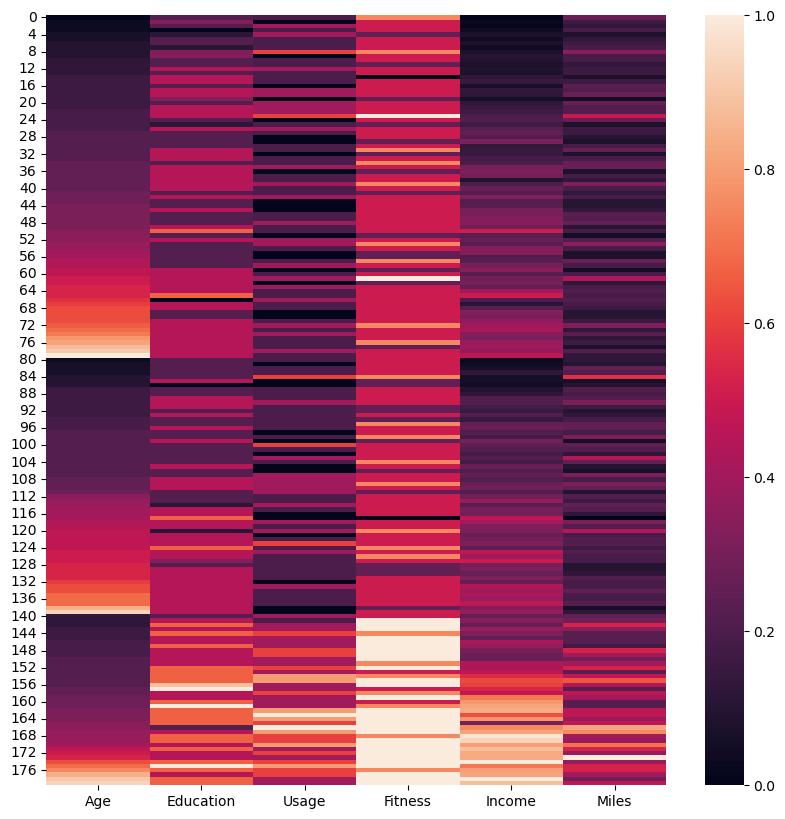

In [277]:
df_cont=df.select_dtypes(include="int64")
normalized_df=(df_cont-df_cont.min())/(df_cont.max()-df_cont.min())
plt.figure(figsize=(10,10))
sns.heatmap(normalized_df)

In [279]:
df_cont.corr()

,Age,Education,Usage,Fitness,Income,Miles
Age,1.000000,0.280496,0.015064,0.061105,0.513414,0.036618
Education,0.280496,1.000000,0.395155,0.410581,0.625827,0.307284
Usage,0.015064,0.395155,1.000000,0.668606,0.519537,0.759130
Fitness,0.061105,0.410581,0.668606,1.000000,0.535005,0.785702
Income,0.513414,0.625827,0.519537,0.535005,1.000000,0.543473
Miles,0.036618,0.307284,0.759130,0.785702,0.543473,1.000000


We can see that there is a high correlation between income and education, usage and fitness, usage and miles

Customer profiling and recommendation

Customer Profile for KP281 Treadmill:

Age of customer are mostly between the age of 21 to 35 years but 1 or 2 data points 50 years. 

Annual Income of customer is less than 40,000-50,000

Education level of customer 14-16 years and above

Weekly Usage - 2 to 4 times

Weekly Running Mileage - 50 to 100 miles


Customer Profile for KP481 Treadmill:

Age of customer mainly between 24 to 35 years with one above 45 years

Annual Income more than 40,000 to 55,000

Education level of customer 14-16 years

Weekly Usage - 3 times most

Weekly Running Mileage - 50 to 100 miles

Customer Profile for KP781 Treadmill:

Age of customer between 25-30 but many are having age more than 40 in the range of 40-50 years

Annual Income of customer in range of 60,000-90,000

Education level of customer 16-18 years

Weekly Usage - 4 to 5 times

Weekly Running Mileage - 100 miles-200 miles and above

Recommendations: 
    
    1. Usage wise KP781 has the most number of miles coverd, but it doesn't attract larger audiences so we would suggest to increase marketing cost fr KP781 and make the product available for audience of all age group. 
    
    
    2. Weekly usage wise KP781 has been used the most, that means this model has the best performance among the 3 including the miles covered, but income for this product being on slightly higher side, we would request to reduce the price for this product or maybe give a discount so that people on income range of 40-50K can also afford it.
    
    3. KP281 has been used the least, need to get feedback from customers whether they are liking the product, and if requires need to do r&d on this to see why it isn't used much. 
    
    4. Females prefer KP281 product more, than the KP481 and KP781 need to know the reason behind it, we would suggest to get feedback from female customers who have bought KP781, on the performance. 
    
    5. Income stack being diffrent for all the 3 products we would suggest that prices should be competitive for all 3, it would be important as KP781 seems like the best product. 